Task 1.0 example answer: **Name: *Jack Muir*, Preferred Name: *Jack*, Email: *jmuir@caltech.edu*, Pronouns: he/him/his **

# Lab # 1 - Introduction to Observational Seismology in Python

Welcome to the first laboratory task of observational seismology. In this set of laboratories, we will learn the skills of modern observational seismology via the Python/Obspy workflow. We will be skipping over some parts of the scientific python ecosystem in favor of jumping right into the seismology - these will be saved for the second lab session. 

## Using the Jupyter Notebook

Jupyter notebooks are a mixture of code cells and markdown text cells. Markdown is a light markup language that allows some flexibility in specifying textual effects (headers, italics etc.) without making the user choose different fonts / sizes etc - for reference, see https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet. Code blocks are executed using a Python kernel. Jupyter is a modal editor; it has a command mode, entered by the **esc** key, and an editing mode, entered by double clicking a cell. In the command mode, you can make a cell markdown by pressing **m**, and code by pressing **y**. To execute a cell, press **shift + enter**. You can create a new cell above by pressing **a**, and below by pressing **b**, whilst in command mode. Try to keep code cells short to keep the logic of your worksheet simple. There are many other keyboard shortcuts that you can find in the Jupyter documentation, and you can also use the menus to perform these tasks. Since this document is a Jupyter notebook itself, you can always double click on one of these markdown text cells to see it in action.

### Task 1.0 - Let's get to know you (1 mark)

Create a cell above the notebook title containing your name and email address & preferred pronoun like so: **Name: *your-name*, Preferred Name: *your-preferred-name*, Email: *your-email*, Pronouns: *your-pronouns***. Feel free to add any extra biographical information (like a preferred name) 

*note here - hopefully students realize that they can double click on this cell to edit it and then just copy the formatting that they see here*

## Importing Obspy

In the Python ecosystem, most interesting pieces of code are kept in modules that must be imported. By a quirk of the Obspy module, we have to import different submodules seperately - see below:

In [1]:
#A fdsn client allow us to connect with web services for obtaining data
from obspy.clients.fdsn import Client
#The UTCDateTime module specifies times in a consistent fashion - useful for specifying dates precisely 
from obspy import UTCDateTime
"""
we can add a "keyword argument" like "timeout" below to certain functions - keyword arguments allow Python functions 
support variable numbers of arguments easily; once the keyword arguments start, their order doesn't matter
we create a new client connected to the IRIS webservice, and increase the timeout value from its default 120s because
2 minutes is often not enough to download all the data we want. 

Note: this is a multiline comment (marked by the triple quotes); these comments can be placed in functions to 
automatically document them - but that is a topic for another day. 
"""
iris_client = Client("IRIS", timeout=600)

## Searching for Events

One of the first things we are often intested in is the location and magnitude of an event. Whilst deriving these from seismograms is nontrivial, for historical events we can often fetch them from a catalogue. Lets look at a recent large earthquake in the Americas, the **2010 Maule earthquake**. 

In [2]:
#we use a UTCDateTime object to set the starting time of our search
st = UTCDateTime("2010-02-27T00:00:00Z")
#we can add a time offset in seconds to get the end time of the search
et = st + 24*3600
#or equivalently just use another UTCDateTime object
et = UTCDateTime("2010-02-28T00:00:00Z")
#we can then use the fdsn client to download an event catalogue, 
#specifying a large minimum magnitude to restrict the results
maule_catalogue = iris_client.get_events(starttime=st, endtime=et, minmagnitude=8)

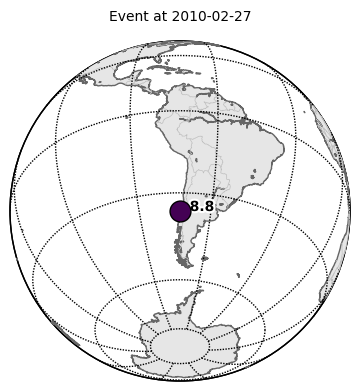

1 Event(s) in Catalog:
2010-02-27T06:34:13.330000Z | -36.148,  -72.933 | 8.8 MW


In [3]:
#we can let obspy automatically plot the results in a nice way - the orthographic "ortho" projection shows the location
#in a continental context. 
maule_catalogue.plot(projection='ortho')
#we can print the catalogue like so (obspy automatically formats it for us)
print(maule_catalogue)

## Regional Earthquake Catalogues

### Task 1.1 - Our Earthquake in Context (10 marks)
Lets put the 2010 Maule earthquake in context. Make a plot of all > 6.5 magnitude earthquakes in South America between the latitudes of 30°S and 0°S, and longitudes of 85°W and 30°W, from 1975 to the beginning of 2017. Make the projection local & turn the magnitude label off so that you can see the spatial variation clearly. 
##### Questions:
 - What spatial features do you see in the data? 
 - From your knowledge of plate tectonics, what are the likely causes of these features?
 - What sort of earthquake was Maule likely to be?

#### *Hint*: 
You should look at the Obspy documentation to observe how to restrict the spatial range of your search appropriately, and to turn the magnitude plotting off. The url for the catalogue search is https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
and for the catalogue plotting
https://docs.obspy.org/packages/autogen/obspy.core.event.catalog.Catalog.plot.html#obspy.core.event.catalog.Catalog.plot

#### Your Code: 

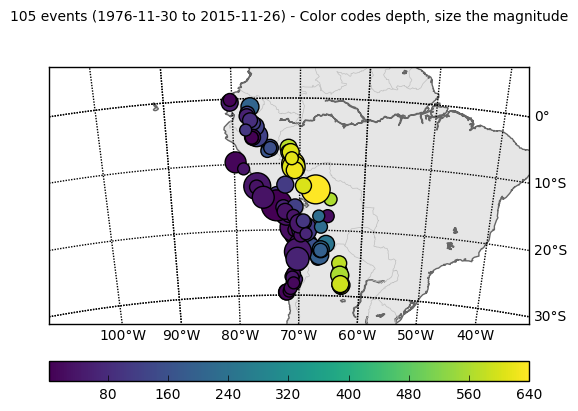

In [5]:
# Start your code here: 

#A possible acceptible answer
st = UTCDateTime("1975-01-01T00:00:00Z")
et = UTCDateTime("2017-01-01T00:00:00Z")

big_catalogue = iris_client.get_events(starttime=st, 
                                      endtime=et, 
                                      minmagnitude=6.5,
                                      minlongitude=-85,
                                      maxlongitude=-30,
                                      minlatitude=-30,
                                      maxlatitude=0)

big_catalogue.plot(projection='local', label=None);

#### Your Answer to the questions:

##### Example good answer:
The earthquakes are concentrated on the western coast of South America. Furthermore, we see that the earthquakes generally increase in depth away from the coastline. We know that the Atlantic coast of South America is a passive continental margin, which explains the lack of large seismicity on the East coast. Additionally, we know that the Nazca plate subducts beneath the South American plate on the Pacific Coast; the deepening seismicity tracks the subducting slab as it penetrates into the mantle. Given the tectonic setting, Maule was likely a subduction associated thrust earthquake.

### Task 1.2 -  Exploring the Depth Distribution of Earthquakes (11 marks total)

Now that we have some feel for the 3D spatial distribution of large earthquakes in South America, lets focus in on their depth behaviour specifically. Obspy does not have much support for statistical plots, so in this section we will have to pull information from Obspy data structures and use that information to create our own plots. The basic & most flexible plotting API in Python is Matplotlib, which we will use in this task. 

In [ ]:
#The main plotting functionality is in the matplotlib submodule pyplot, which is idiomatically imported as plt
import matplotlib.pyplot as plt
#In order to tell matplotlib to generate its plots inside the Jupyter notebook instead of a seperate window, we need 
#to tell it to plot inline as shown
%matplotlib inline

### Task 1.2.0 - Downloading a Big Catalogue (1 mark)

Now that we have set up Matplotlib, we need to get a more comprehensive dataset to look at. Download a catalogue containing all earthquakes with magnitude greater than 3 between the start of 1975 & the start of 2017, between the latitudes of 30°S and 0°S, and longitudes of 80°W and 60°W (this longitude range restricts our focus to the western coast of South America). This catalogue may take a while to download, so you should take this time to discuss with your neighbours and the instructor your thoughts. 

In [62]:
st = UTCDateTime("1975-01-01T00:00:00Z")
et = UTCDateTime("2017-01-01T00:00:00Z")

your_catalogue = iris_client.get_events(starttime=st, 
                                            endtime=et, 
                                            minmagnitude=3,
                                            minlongitude=-80,
                                            maxlongitude=-60,
                                            minlatitude=-30,
                                            maxlatitude=0)

Once you have your catalogue, we will use a construct known as a *list comprehension* to pull out the event depths from the somewhat complicated catalogue data structure as shown. List comprehensions are one of Python's most useful features; they allow us to do away with many operations involving loops and provide a user friendly, readable syntax. They become powerful because they can be combined with iterator objects and logical predicates to sift through data efficiently - in this case, some of the events don't have associated depth data for their origins. Python represents this by a None type, that can't be plotted for obvious reasons. We filter out the data by using a logical predicate as shown. In Python 3 we can also use comprehensions for sets and dictionaries (dictionaries are collections of key-value pairs in Python). They require some practice to use, but there are plenty of good tutorials on the internet. Once we have the depth information, we can make a histogram of the depths as shown. 

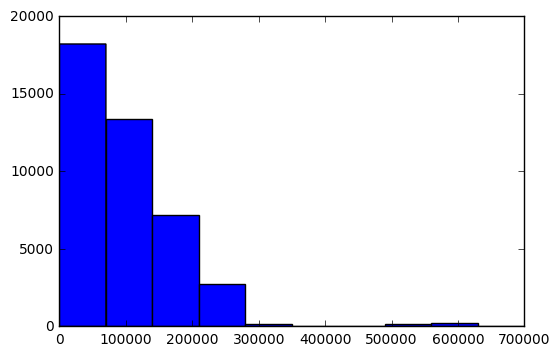

In [87]:
#Make sure that you replace "your_catalogue" with whatever you have, in fact, called your catalogue
depths = [ev.origins[0].depth for ev in your_catalogue if ev.origins[0].depth != None]
"""
The plt.hist function makes this plot, but also returns a lot of information about the plot, namely the number of
counts in each bin, the position of the bins 
"""
counts, bins, patches = plt.hist(depths, bins=10)

### Task 1.2.1 - Making Nicer Plots & Interpreting their Features (10 marks)

Let's make this plot look a bit more professional! Take the data used to generate the above plot and give it the following (then answer the questions) 

##### Required Plot Features:
- A title (fontsize 14)
- Labels for the x & y axes (fontsize 14)
- Log scale for the y axis so that the surface features don't dominate the plot
- X scale in km rather than m
- At least 20 histogram bins since we have lots of earthquakes
- A "step" rather than "bar" type histogram (bonus if you can fill in the steps with a complementary light color whilst still seeing the edge of the steps)

** *Questions:* **

- How does the distribution of earthquakes (seismicity) change with depth?
- How reliable do you think inferences about seismicity generated from your plot are? What factors contribute to any uncertainties?  

** *Hint:* **

In order to create the plot specified above, the documentation for pyplot, found at http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist, will be very helpful. In order to set the x-scale to km, try creating a new dataset of depths using a comprehension.

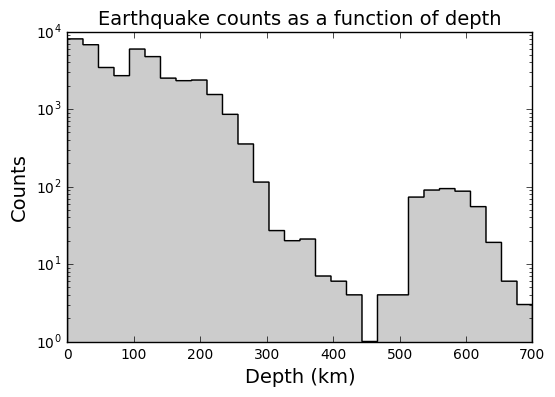

In [89]:
#Your Code:

#Example student code:

km_depths = [d/1000 for d in depths]
counts, bins, patches = plt.hist(km_depths, bins=30, histtype='step', color='k')
counts, bins, patches = plt.hist(km_depths, bins=30, histtype='stepfilled', color='k', alpha=0.2)
plt.yscale('log')
plt.xlabel('Depth (km)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Earthquake counts as a function of depth', fontsize=14)

#### Your Answer to the question:

**Example good student answer**

We see that the maximum seismicity rate occurs at the surface, with seismicity steadily dropping to about 200km in depth, and then dropping suddently to near zero by 300km in depth. It then rises significantly, peaking around 600km in depth before dying off again by 700km in depth. 

Two factors that will influence the reliability of these inferences are the quality of the depth solutions themselves, and the strength of the statistics we can draw from the number of events observed. We as yet have no way of assessing the quality of the depth solutions, so it is hard to judge how this may influence the plot, however if we have sufficient numbers of earthquakes & we assume that any errors in depth are not systematically biased, then the broad statistical behaviour of our sample should be correct. In terms of the number of events observed, we see that most bins in the above plot have greater than 10 earthquakes, and some have near 10000.  Thus most depth ranges should be roughly accurate if we assume that the pattern of seismicity does not change much on decadal time scales. However, the depth range of around 350-500 km does not have sufficient seismicity in this 42 year time period to be adequately resolved - a longer time period of observation is required.

### Task 1.3 - Student Feedback (3 marks)

That is the end of the technical tasks for this lab. In order to improve the labs as the term progresses, we would like to solicit some feedback from you. Please answer the following feedback questions:

** *Questions:* **

- What have you learnt in this lab? 
- Will you implement any of the skills practiced in this lab in your own research?
- How did you find the tasks - did they expand your knowledge of seismology? Of Python? 
- Do you have any other feedback you would like to relay to the instructor? 

#### Your answer to the questions: